```
Drs. Allison Horst, Alison Presmanes Hill (RStudio), and Dr. Kristen  
B. Gorman (Palmer Station, University of Alaska Fairbanks)  
collaborated on developing the palmerpenguins R package. The dataset  
features structural size measurements for three penguin  
species: Adelie, Gentoo, and Chinstrap. The meticulous work  
conducted by Dr. Kristen B. Gorman and her team at Palmer Station  
Long-Term Ecological Research site in Antarctica exemplifies their  
curiosity, attention to detail, and adherence to rigorous  
methodologies, resulting in high-quality data.

In addition to Ronald Fisher's Iris dataset, the palmerpenguins  
dataset offers distinct variables that enable researchers and  
practitioners to perform comprehensive analyses and conduct  
algorithmic testing. By utilizing both datasets as benchmarks,  
professionals can expand the application of machine learning  
algorithms while enhancing their appreciation of the penguin  
species.
```
dataset home: https://allisonhorst.github.io/palmerpenguins/  
git fanClub: https://github.com/mcnakhaee/palmerpenguins  

## **`palmerpenguins assignment overview`**


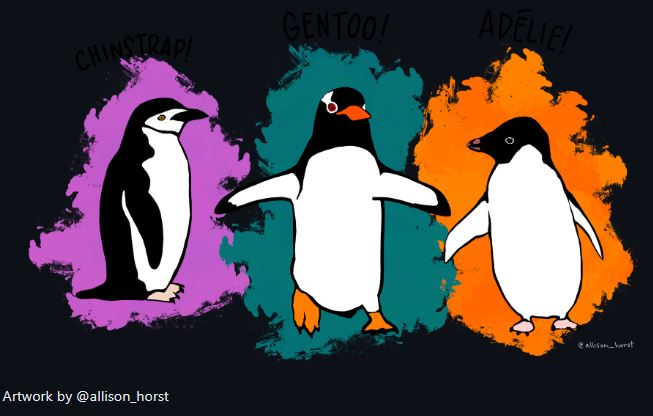

**`Stage.1=> Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

**`Stage.2=> Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

**`Stage.3=> (Pick 4) Machine learning and Hyperparameter Tuning`**  
```
- 3. Fine-tune the hyperparameters to optimize their performance.  
-  Use techniques like grid or random search to explore different  
  combinations of hyperparameters and their configuration.  
- 3 Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- Attempt to tune a couple parameters and add a bullet of what you  
did in the executive summary.  


**`Part 4=> Model Interpretation and Validation`**  
```
- 4.1 Interpret the trained models to understand the relationship  
=> between their features and the predicted penguin species.  
- 4.2 Ensure robustness and reliability and validate with items like    
=>  k-fold, cross-validation, and holdout to name a few.  
```

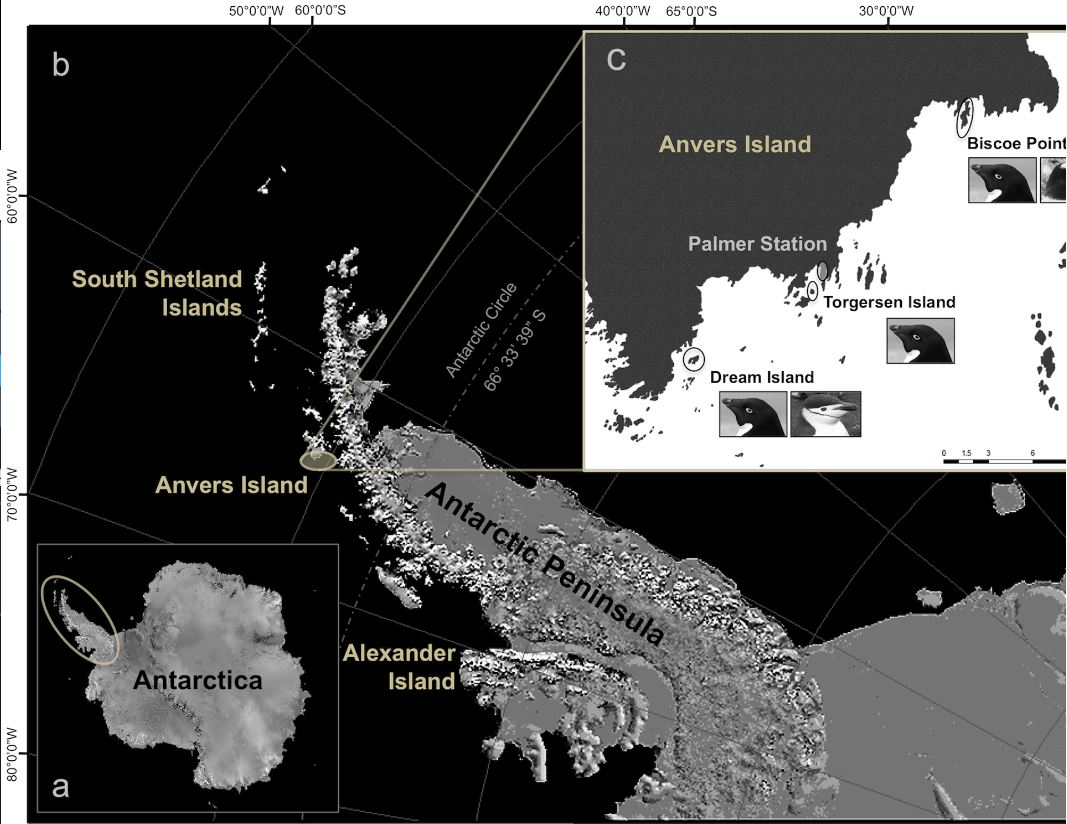  

References  
Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081  
- [link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)  

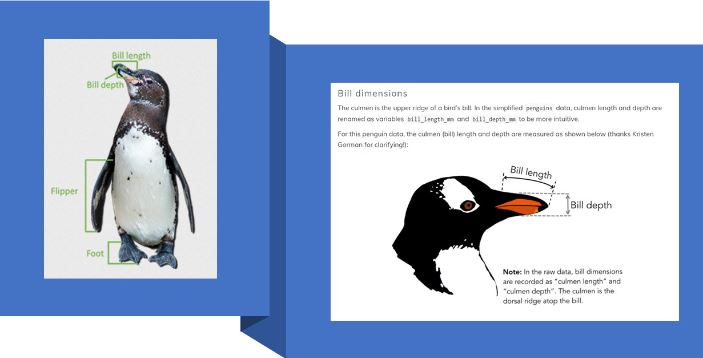


## **`Penguin`** **=>** **`Enter Your Executive Summary`**

### **`Executive Summary`**
- #### Accumulate pertinent learnings and outcomes as bullets.  
- #### Include one or two graphs if `>2.st.dev`  

In [ ]:
#=>Answer: Executive summary about dataset

# Of the features used within the dataset, 4 were selected from a pairplot and PCA for use.
# The four features were selected due to being linearly separable. They are bill length and depth, flipper length, and mass.
# This makes sense as these four are the only non-categorical features to test for.
# Removal was selected for the set since only about 5% of all rows were unusable.
# Data was split 80/10/10
# Looking at the results of the 4 tests, Random Forest had the lowest score, likely due to the size of the set. Random Forest generalizes better with more data, so it is likely overfitting with this model.
# Overall, the scores for the models are high even before doing hyperparameter tuning. This could be since the datasets are so small?

## **`Penguin analysis stages`**

### **`Stage.1.`** **=>**  **`Part 1: Dataset Inspection and Preprocessing`**  

**`Stage.1: Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

`Stage.1.Tasks and outcomes`   
`Stage.1.Task.1` => Given prior learnings logically assemble your data preprocessing.   
`Stage.1.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  

In [50]:
#=>Enter Solution analysis
#Data Loading
import pandas as pd
from palmerpenguins import load_penguins

df = load_penguins()

print(df.head())

print(f"length: {len(df)}")

print(f"\nMissing values:\n{df.isna().sum()}")

df.dropna(inplace=True) # Given how few rows are lost, dropping rows with missing values should be fine

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
length: 344

Missing values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


`Helpful outcomes`  

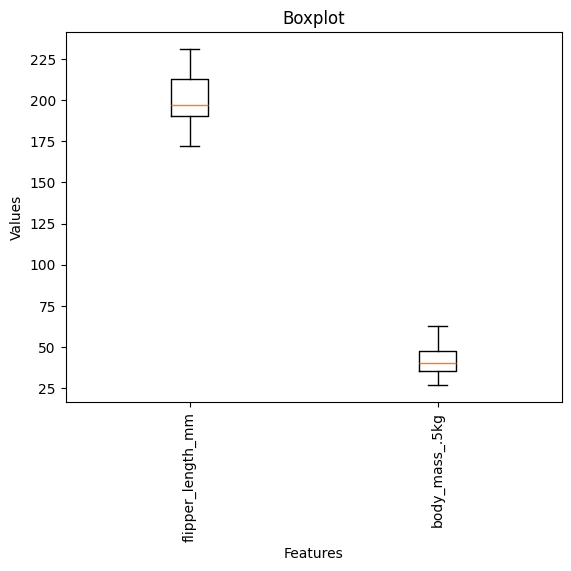

In [49]:
# Assorted Notes and Tips:
#=> data transformations assist with scaling to build compound graphs
#=> Mean subsitution is a viable option. is it worth it?
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins  #via !pip install palmerpenguins
df = load_penguins()
# Divide 'body_mass_g' column by 1000
df['body_mass_.5kg'] = df['body_mass_g'] / 100

df_subset = df.drop(['species', 'sex', 'island','year','body_mass_g','bill_length_mm','bill_depth_mm'], axis=1)
df_subset.dropna(inplace=True)  #drops an NaN data!
plt.boxplot(df_subset.values)
plt.xticks(range(1, len(df_subset.columns) + 1), df_subset.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()

### **`Stage.2`** **=>**  **`Part 2: Feature Selection and Engineering`**  

**`Stage.2: Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

`Stage.2.Tasks and outcomes`  
`Stage.2.Task.1` => Given prior learnings logically assemble your feature selection and engineering.    
`Stage.2.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


#### **`Task.2.solution`**

['Adelie' 'Gentoo' 'Chinstrap']


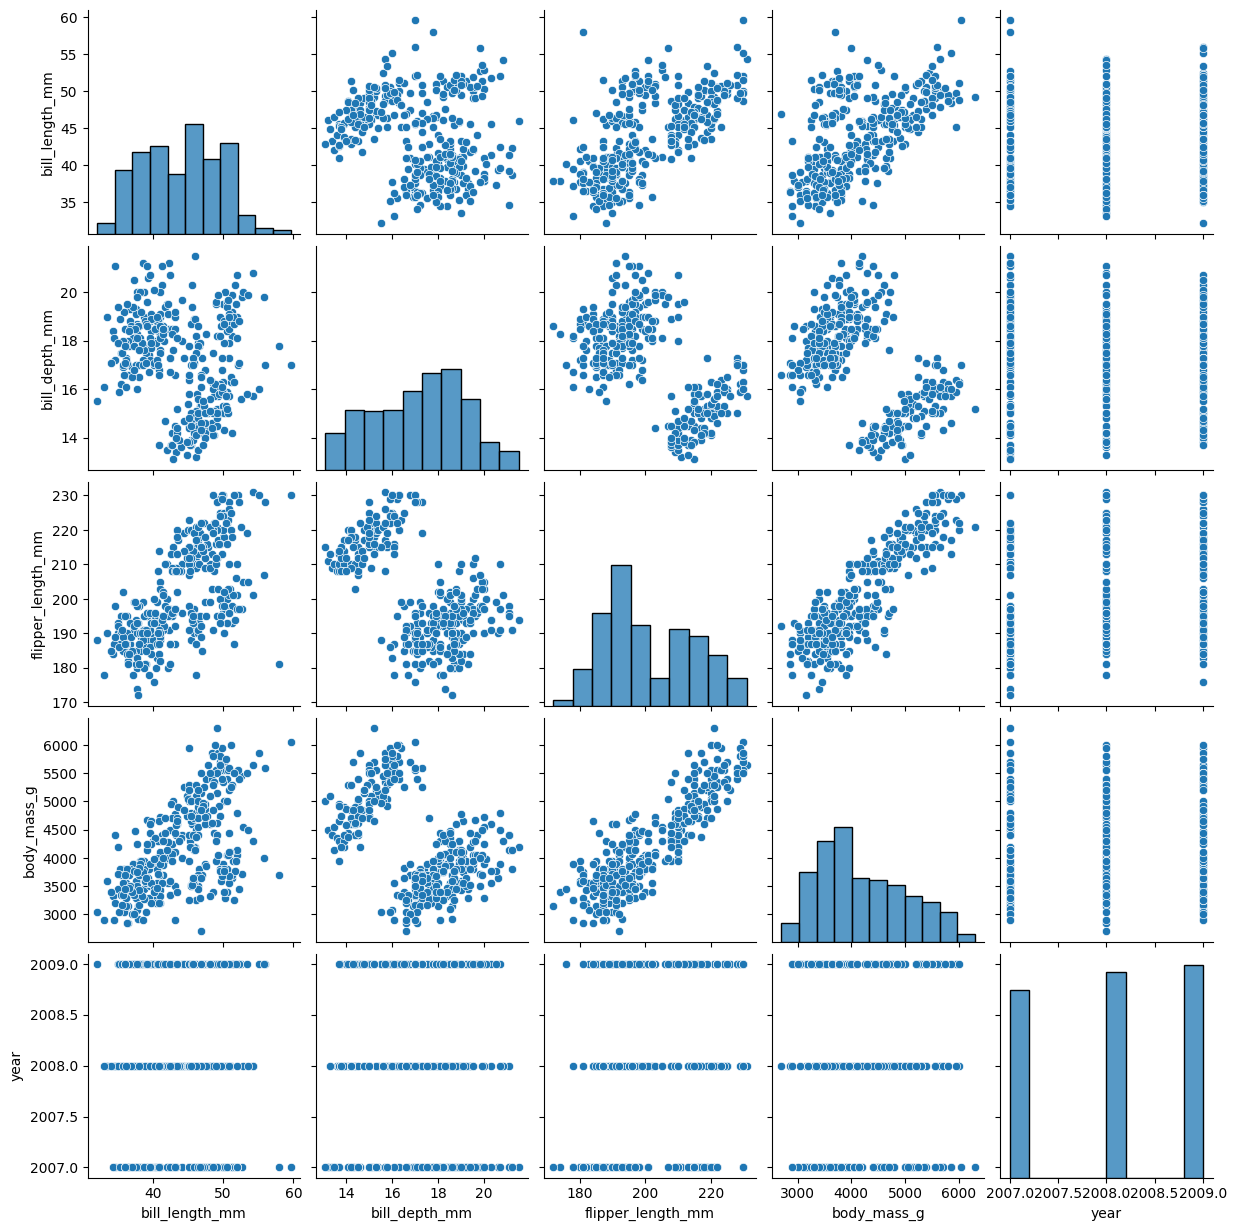

In [51]:
#=>Enter Answer (may be extended over multiple cells), The end of your answer should show a df.head().
#This is a good place to create an 80 10 10 split for training, validation, and holdout.
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

print(df['species'].unique())

In [ ]:
# When looking at a pair plot of all variables, the only 4 that seem to be separable are bill length, bill depth, flipper length, and body mass.
# There is especially strong separation in bill length vs. depth, as there appear to be 3 clusters.

In [52]:
# PCA Approach for feature selection. 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']
scaler = StandardScaler()



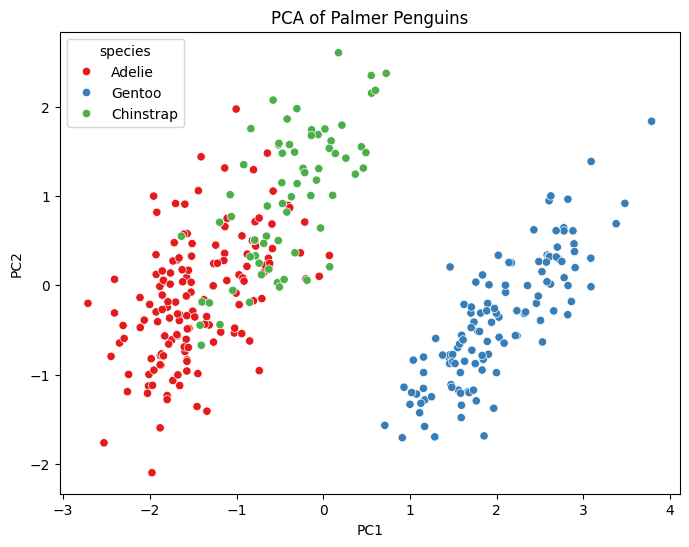

In [46]:
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1')
plt.title('PCA of Palmer Penguins')
plt.show()

In [41]:
loadings = pd.DataFrame(pca.components_.T, index = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], columns=['PC1', 'PC2'])
print(loadings.round(2))

                    PC1   PC2
bill_length_mm     0.45  0.60
bill_depth_mm     -0.40  0.80
flipper_length_mm  0.58  0.01
body_mass_g        0.55  0.08


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_TV, y_train, y_TV = train_test_split(X, y, test_size=0.30, random_state=41, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_TV, y_TV, test_size=0.5, random_state=41, stratify=y_TV)

print(X_train.head())
print(X_train.head())
print(X_train.head())

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
118            35.7           17.0              189.0       3350.0
284            46.0           18.9              195.0       4150.0
63             41.1           18.2              192.0       4050.0
148            36.0           17.8              195.0       3450.0
77             37.2           19.4              184.0       3900.0
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
118            35.7           17.0              189.0       3350.0
284            46.0           18.9              195.0       4150.0
63             41.1           18.2              192.0       4050.0
148            36.0           17.8              195.0       3450.0
77             37.2           19.4              184.0       3900.0
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
118            35.7           17.0              189.0       3350.0
284            46.0           18.9              195.0       41

### **`Stage.3`** **=>**  **`Pick 4 - Machine learning and Hyperparameter Tuning`**

**`Stage.3: Machine learning and Hyperparameter Tuning`**  
```
- 3.1 Fine-tune the hyperparameters to optimize their performance.  
     Use techniques like grid or random search to explore different  
     combinations of hyperparameters and their configuration.  
-    Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- `Attempt` to tune a couple parameters and add a bullet of what you  
did in the executive summary.

`Stage.3.Tasks and outcomes`  
`Stage.3.Task.1` => Given prior learnings logically assemble your Machine learning and Hyperparameter Tuning.    
`Stage.3.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


`Alogithm homepage with hyperparameters`  

- Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearnlinear_model.LogisticRegression.html#sklearn-linear-model-logisticregression

- Naïve Bayes
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn-naive-bayes-gaussiannb

- k-Nearest Neighbor
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

- Decision Tree
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier

- Random Forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier

- Support Vector Machine
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc

- Neural Networks/ Convolutional Neural Networks
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised



In [5]:
#=>Enter Answer (Pick 4 from the above and extend over at least one cell per approach)

#---- suggested order for each approach -----
# SUPERVISED APPROACH: [approach]
# Initial Performance Results (Validation):
# Hyper Parameter Exploration Results (Validation):

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

## Stage 3: Logistic regression

In [89]:
# SUPERVISED APPROACH: Logistic Regression

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)
lr.fit(X_train_scaled, y_train)
y_val_pred = lr.predict(X_val_scaled)

/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [90]:
# Logistic regression inital performance results

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        22
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [91]:
# Hyperparameter tuning

param_grid_lr = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'penalty' : ['l2', 'l1'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

grid_lr.fit(X_train_scaled, y_train)
print("# Hyper Parameter Exploration Results (Validation):")
print(f"Best params: {grid_lr.best_params_}")
print(f"Best CV score: {grid_lr.best_score_:.4f}")

y_val_pred_tuned = grid_lr.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_tuned))


/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:124

# Hyper Parameter Exploration Results (Validation):
Best params: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best CV score: 0.9914
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:124

## Stage 3: Random Forest

In [92]:
# SUPERVISED APPROACH: Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)



In [93]:
#  Initial Performance Results 

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        22
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [94]:
# Hyperparameter Tuning

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [None, 5, 10, 20],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [2, 5 ,10]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("# Hyper Parameter Exploration Results (Validation):")
print(f"Best params: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

y_val_pred_tuned = grid_rf.predict(X_val)
print(classification_report(y_val, y_val_pred_tuned))

# Hyper Parameter Exploration Results (Validation):
Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
Best CV score: 0.9744
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        22
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constr

## Stage 3: K-nearest neighbors:

In [95]:
# SUPERVISED APPROACH: K-Nearest Neighbor

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_val_pred = knn.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

      Adelie       0.92      1.00      0.96        22
   Chinstrap       1.00      0.80      0.89        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.96        50
   macro avg       0.97      0.93      0.95        50
weighted avg       0.96      0.96      0.96        50



In [96]:
# Hyperparameter tuning

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs = -1)
grid_knn.fit(X_train_scaled, y_train)
print("# Hyper Parameter Exploration Results (Validation):")
print(f"Best params: {grid_knn.best_params_}")
print(f"Best CV score: {grid_knn.best_score_:.4f}")

y_val_pred_tuned = grid_knn.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_tuned))

# Hyper Parameter Exploration Results (Validation):
Best params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best CV score: 0.9914
              precision    recall  f1-score   support

      Adelie       0.92      1.00      0.96        22
   Chinstrap       1.00      0.80      0.89        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.96        50
   macro avg       0.97      0.93      0.95        50
weighted avg       0.96      0.96      0.96        50



## Stage 3: Support Vector Machine

In [97]:
# SUPERVISED APPROACH: Support Vector Machine

svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_val_pred = svm.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        22
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [98]:
# Hyperparameter tuning

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

print("# Hyper Parameter Exploration Results (Validation):")
print(f"Best params: {grid_svm.best_params_}")
print(f"Best CV score: {grid_svm.best_score_:.4f}")

y_val_pred_tuned = grid_svm.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred_tuned))

# Hyper Parameter Exploration Results (Validation):
Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.9914
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## **`Stage.4.`** **=>**  **`Part 4: Model Interpretation and Validation`**

**`Part 4: Model Interpretation and Validation`**  
```
- 4 Interpret the trained models to understand the relationship  
     between their features and the predicted penguin species.  
-  Ensure robustness and reliability and validate with
     k-fold, cross-validation, and holdout to name a few.
```

In [99]:
#Enter answer (Use the results from the 4 algorithms you picked and extend over at least one cell per approach)
#Evaluate using k-fold validation (k=5).
#Evaluate against the Holdout Set without changing hyperparameters.

from sklearn.model_selection import cross_val_score


In [105]:
# Logistic Regression

best_lr = grid_lr.best_estimator_
cv_scores_lr = cross_val_score(best_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy Scores: {cv_scores_lr}")

y_test_pred_lr = best_lr.predict(scaler.transform(X_test))
print(classification_report(y_test, y_test_pred_lr))

CV Accuracy Scores: [0.9787234  1.         1.         0.97826087 1.        ]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jacob/

In [104]:
# Random Forest

best_rf = grid_rf.best_estimator_
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy Scores: {cv_scores_rf}")

y_test_pred_rf = best_rf.predict(scaler.transform(X_test))
print(classification_report(y_test, y_test_pred_rf))

CV Accuracy Scores: [0.93617021 0.95744681 0.9787234  0.97826087 1.        ]
              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61        22
   Chinstrap       0.00      0.00      0.00        10
      Gentoo       0.00      0.00      0.00        18

    accuracy                           0.44        50
   macro avg       0.15      0.33      0.20        50
weighted avg       0.19      0.44      0.27        50



/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jacob/CodeSpace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarn

In [106]:
# K-nearest neighbor

best_knn = grid_knn.best_estimator_
cv_scores_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy Scores: {cv_scores_knn}")

y_test_pred_knn = best_knn.predict(scaler.transform(X_test))
print(classification_report(y_test, y_test_pred_knn))

CV Accuracy Scores: [1.         1.         0.9787234  0.97826087 1.        ]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [108]:
# SVM
best_svm = grid_svm.best_estimator_
cv_scores_svm = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy Scores: {cv_scores_svm}")

y_test_pred_svm = best_svm.predict(scaler.transform(X_test))
print(classification_report(y_test, y_test_pred_svm))

CV Accuracy Scores: [1.         1.         0.9787234  0.97826087 1.        ]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

